<a href="https://colab.research.google.com/github/kimsang-kyu/Python_application/blob/main/20200525_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [ ]:
data_file = 'https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv'

In [ ]:
#data load
iris = pd.read_csv(data_file)
iris

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [ ]:
## 설명변수(x)와 반응변수(y)
# Petal.Length와 Width를 이용하여 이것에 따른 분류
x = iris.iloc[50:,3:5] 
y = iris.iloc[50:,5]
y, y_levels = pd.factorize(y)

In [ ]:
### Train과 test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

In [ ]:
#logistic regression
logistic = LogisticRegression()
model = logistic.fit(x_train,y_train)

In [ ]:
###예측
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1])

In [ ]:
#교차표
pd.crosstab(y_test,y_pred)

col_0,0,1
row_0,,
0,21,1
1,3,15


In [ ]:
model.score(x_test,y_test)

0.9

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        22
           1       0.94      0.83      0.88        18

    accuracy                           0.90        40
   macro avg       0.91      0.89      0.90        40
weighted avg       0.90      0.90      0.90        40



In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

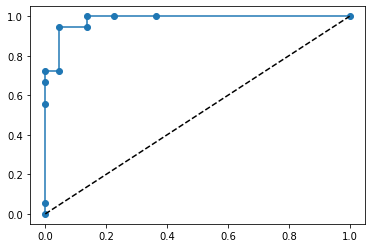

In [ ]:
###ROC 커브
f_value = model.decision_function(x_test)
p_value = model.predict_log_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, p_value)

plt.plot(fpr,tpr, 'o-')
plt.plot([0,1],[0,1], 'k--')
plt.show()

### 문제

In [ ]:
mtcars = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/mtcars.csv')
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
###설명변수(x)와 반응변수(y)
x = mtcars[['mpg','am']]
y = mtcars.vs

In [ ]:
###Train & Test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

In [ ]:
#logistic regression
logistic = LogisticRegression()
model = logistic.fit(x_train,y_train)

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0])

In [ ]:
pd.crosstab(y_test,y_pred)

col_0,0,1
vs,,
0,7,0
1,2,4


In [ ]:
model.score(x_test,y_test)

0.8461538461538461

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.67      0.80         6

    accuracy                           0.85        13
   macro avg       0.89      0.83      0.84        13
weighted avg       0.88      0.85      0.84        13



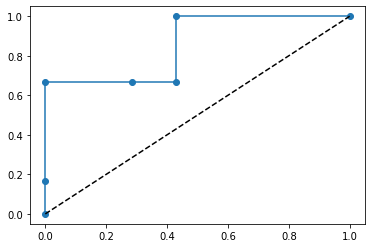

In [ ]:
###ROC 커브
f_value = model.decision_function(x_test)
p_value = model.predict_log_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, p_value)

plt.plot(fpr,tpr, 'o-')
plt.plot([0,1],[0,1], 'k--')
plt.show()

결과를 가지고 분석을 하고 이해할 수 있어야 한다!